Import Libraries and Define Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(x, y):
    return x**2 + y**2 + x*(y + 2) + np.cos(3*x)

# Define the gradients
def df_dx(x, y):
    return 2*x + (y + 2) - 3*np.sin(3*x)

def df_dy(x, y):
    return 2*y + x

# Gradient function that returns both partial derivatives
def gradient(x, y):
    return np.array([df_dx(x, y), df_dy(x, y)])

Gradient Descent Algorithm

In [2]:
# Implement gradient descent
def gradient_descent(learning_rate=0.01, max_iterations=1000, tol=1e-6, initial_point=np.array([2.0, 2.0])):
    # Initial point
    point = initial_point.copy()
    path = [point.copy()]

    for i in range(max_iterations):
        grad = gradient(point[0], point[1])
        # Update rule
        new_point = point - learning_rate * grad

        # Check for convergence
        if np.linalg.norm(new_point - point) < tol:
            point = new_point
            path.append(point.copy())
            break

        point = new_point
        path.append(point.copy())

    return np.array(path)

Gradient Descent with Different Learning Rates

In [3]:
# Run gradient descent with different learning rates
paths = {
    'Learning Rate = 0.01': gradient_descent(learning_rate=0.01),
    'Learning Rate = 0.05': gradient_descent(learning_rate=0.05),
    'Learning Rate = 0.1': gradient_descent(learning_rate=0.1)
}

# Find the minimum for each learning rate
for name, path in paths.items():
    final_point = path[-1]
    min_value = f(final_point[0], final_point[1])
    print(f"{name}:")
    print(f"  Minimum found at: x = {final_point[0]:.6f}, y = {final_point[1]:.6f}")
    print(f"  Function value at minimum: {min_value:.6f}")
    print(f"  Number of iterations: {len(path)}")
    print()

Learning Rate = 0.01:
  Minimum found at: x = -1.088157, y = 0.544030
  Function value at minimum: -2.280710
  Number of iterations: 618

Learning Rate = 0.05:
  Minimum found at: x = -1.088161, y = 0.544072
  Function value at minimum: -2.280710
  Number of iterations: 135

Learning Rate = 0.1:
  Minimum found at: x = -1.088162, y = 0.544078
  Function value at minimum: -2.280710
  Number of iterations: 66



 Meshgrid for Plotting


In [4]:
# Create meshgrid for plotting the function surface
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

3D Surface and Contour Plots

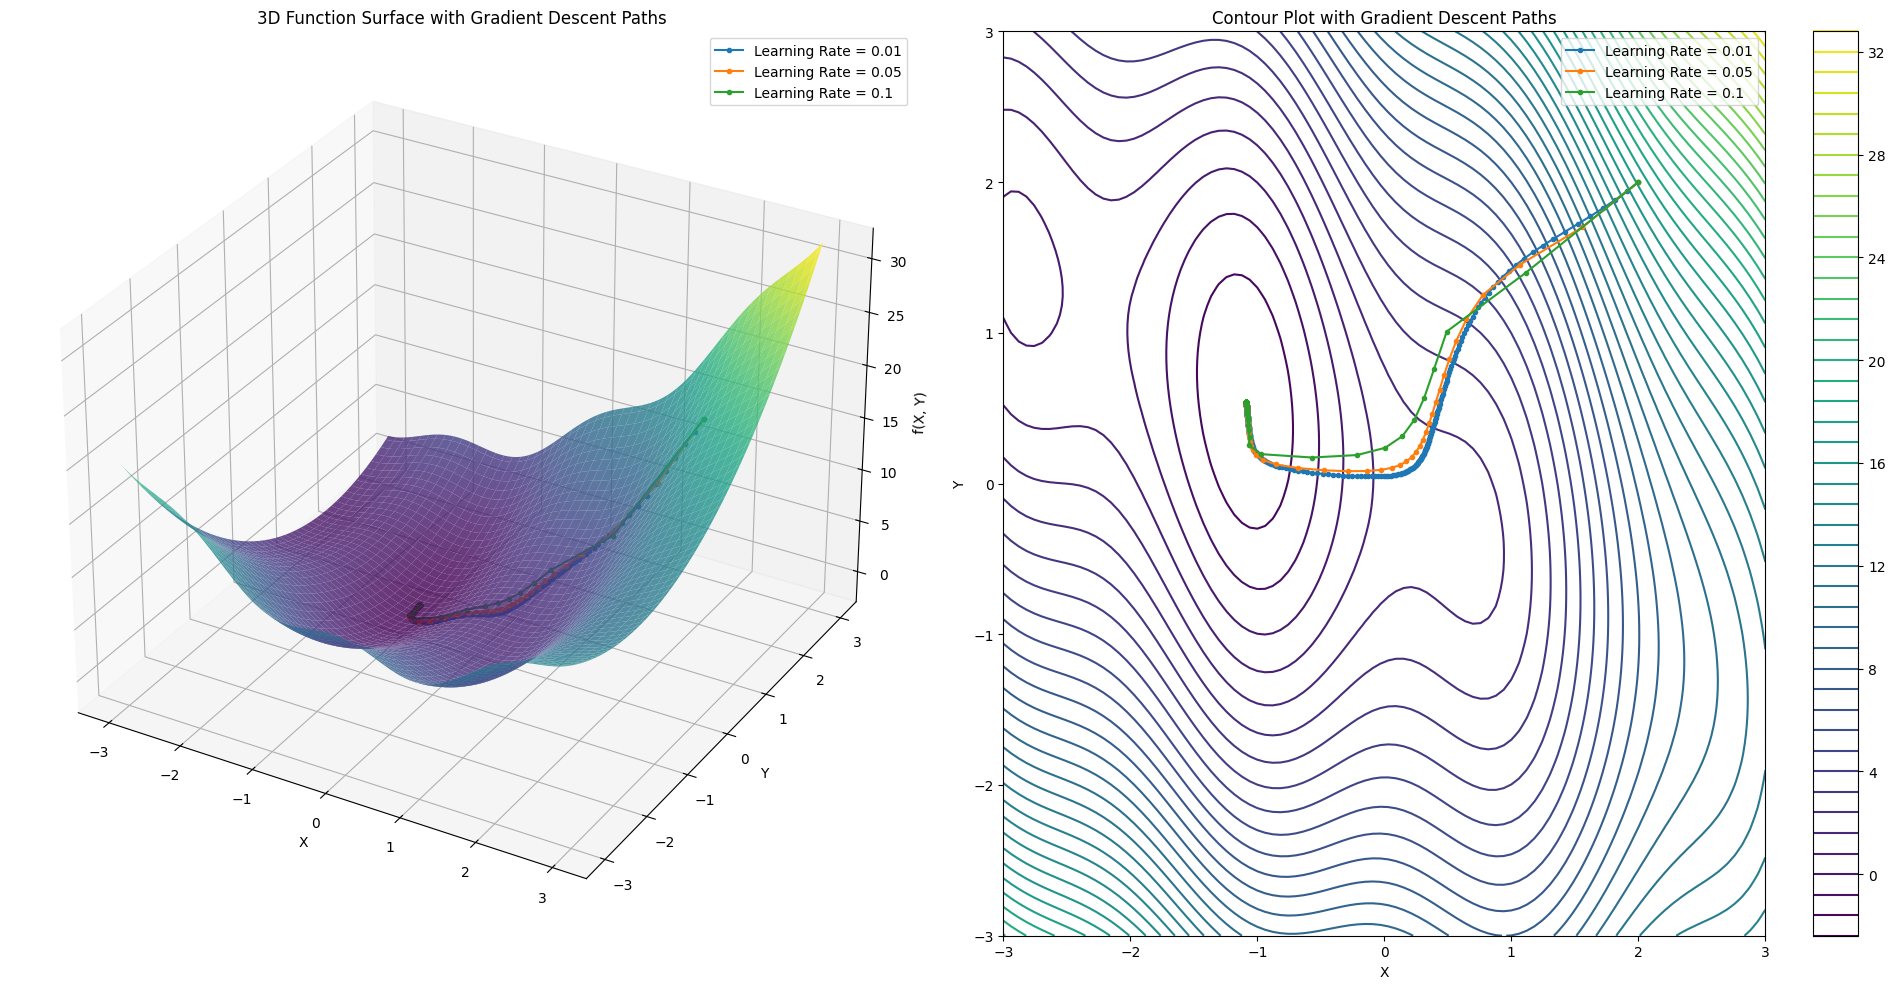

In [5]:
# Create figure for 3D Surface and Contour plots
plt.figure(figsize=(20, 10))

# 3D Surface Plot
ax1 = plt.subplot(121, projection='3d')
surface = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
for name, path in paths.items():
    ax1.plot(path[:, 0], path[:, 1], f(path[:, 0], path[:, 1]),
             marker='o', linestyle='-', markersize=3, label=name)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('f(X, Y)')
ax1.set_title('3D Function Surface with Gradient Descent Paths')
ax1.legend()

# Contour Plot
ax2 = plt.subplot(122)
contour = ax2.contour(X, Y, Z, 50, cmap='viridis')
plt.colorbar(contour, ax=ax2)
for name, path in paths.items():
    ax2.plot(path[:, 0], path[:, 1], marker='o', linestyle='-', markersize=3, label=name)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Contour Plot with Gradient Descent Paths')
ax2.legend()

plt.tight_layout()
plt.savefig('gradient_descent_surface_contour.png', dpi=300)
plt.show()

Convergence Plots

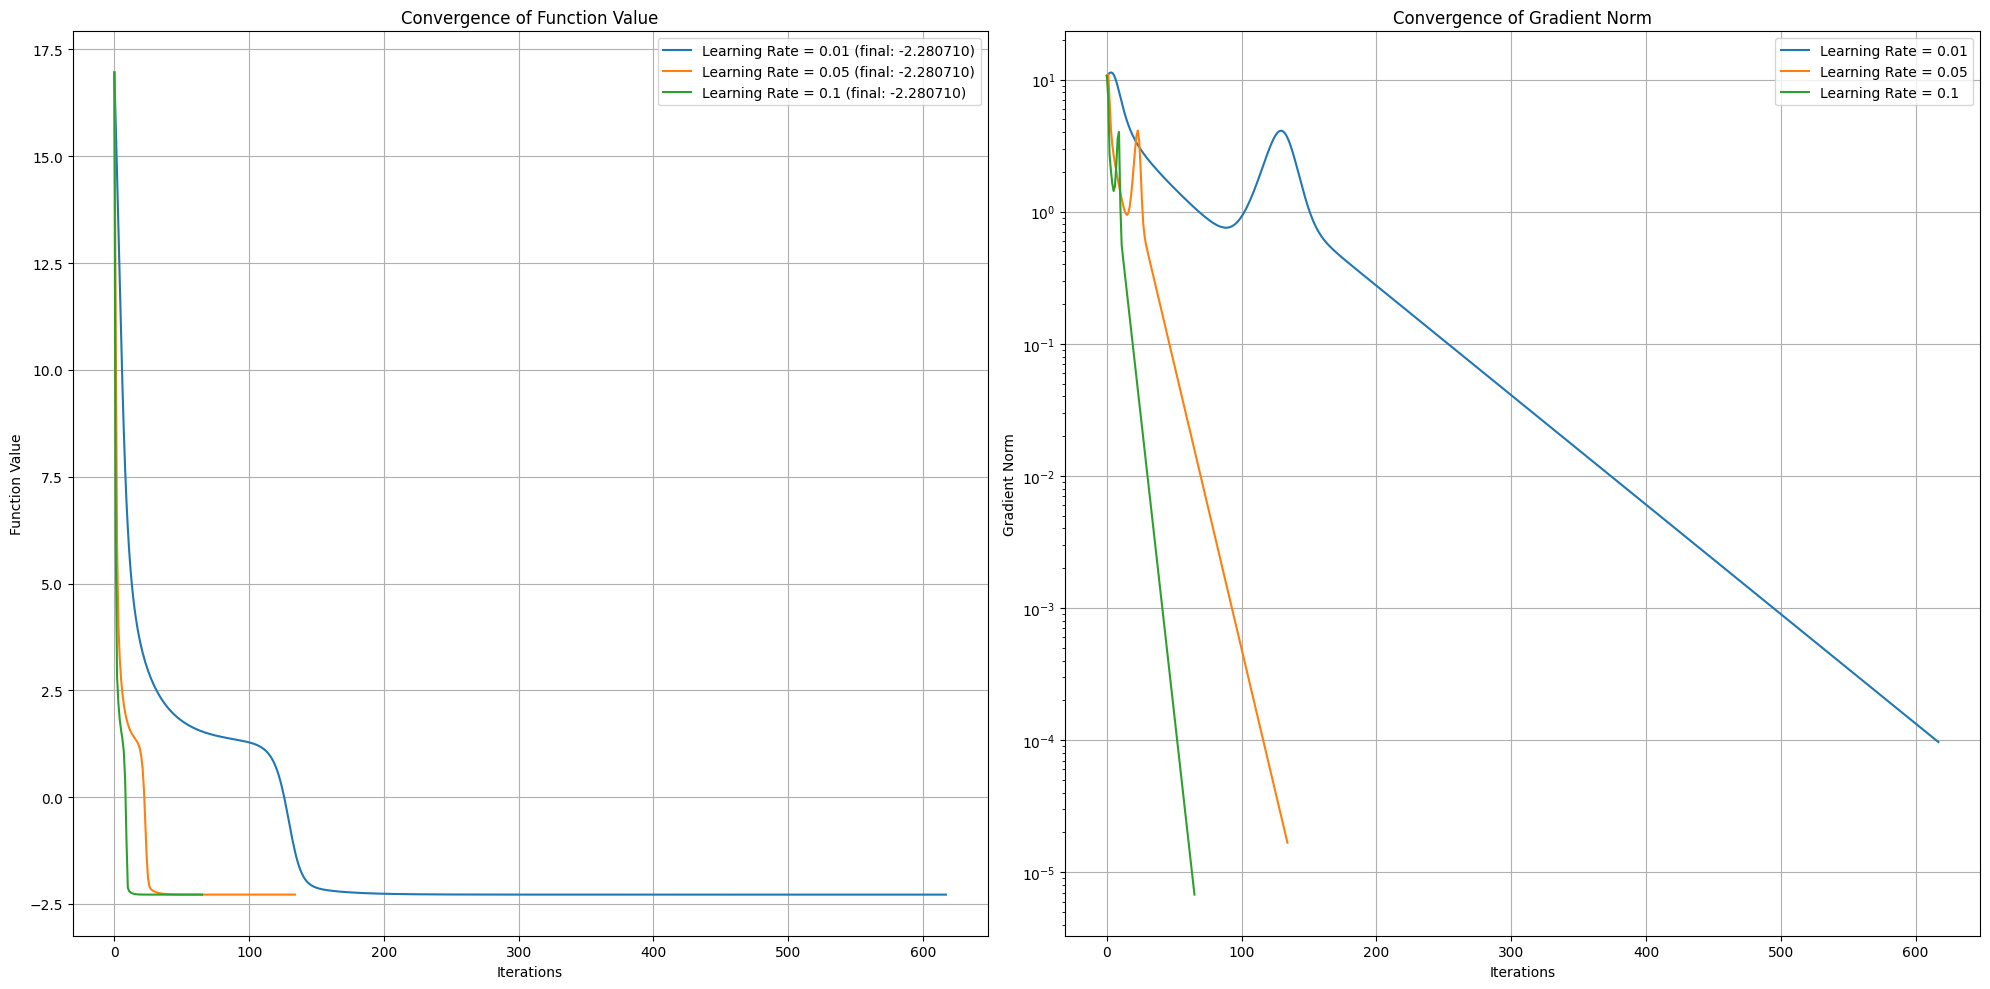

In [6]:
# Create figure for convergence plots
plt.figure(figsize=(20, 10))

# Convergence Plot - Function Value vs Iterations
ax3 = plt.subplot(121)
for name, path in paths.items():
    values = [f(p[0], p[1]) for p in path]
    ax3.plot(range(len(values)), values, label=f'{name} (final: {values[-1]:.6f})')
ax3.set_xlabel('Iterations')
ax3.set_ylabel('Function Value')
ax3.set_title('Convergence of Function Value')
ax3.legend()
ax3.grid(True)

# Convergence Plot - Gradient Norm vs Iterations
ax4 = plt.subplot(122)
for name, path in paths.items():
    grad_norms = [np.linalg.norm(gradient(p[0], p[1])) for p in path]
    ax4.plot(range(len(grad_norms)), grad_norms, label=f'{name}')
ax4.set_xlabel('Iterations')
ax4.set_ylabel('Gradient Norm')
ax4.set_title('Convergence of Gradient Norm')
ax4.set_yscale('log')
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.savefig('gradient_descent_convergence.png', dpi=300)
plt.show()

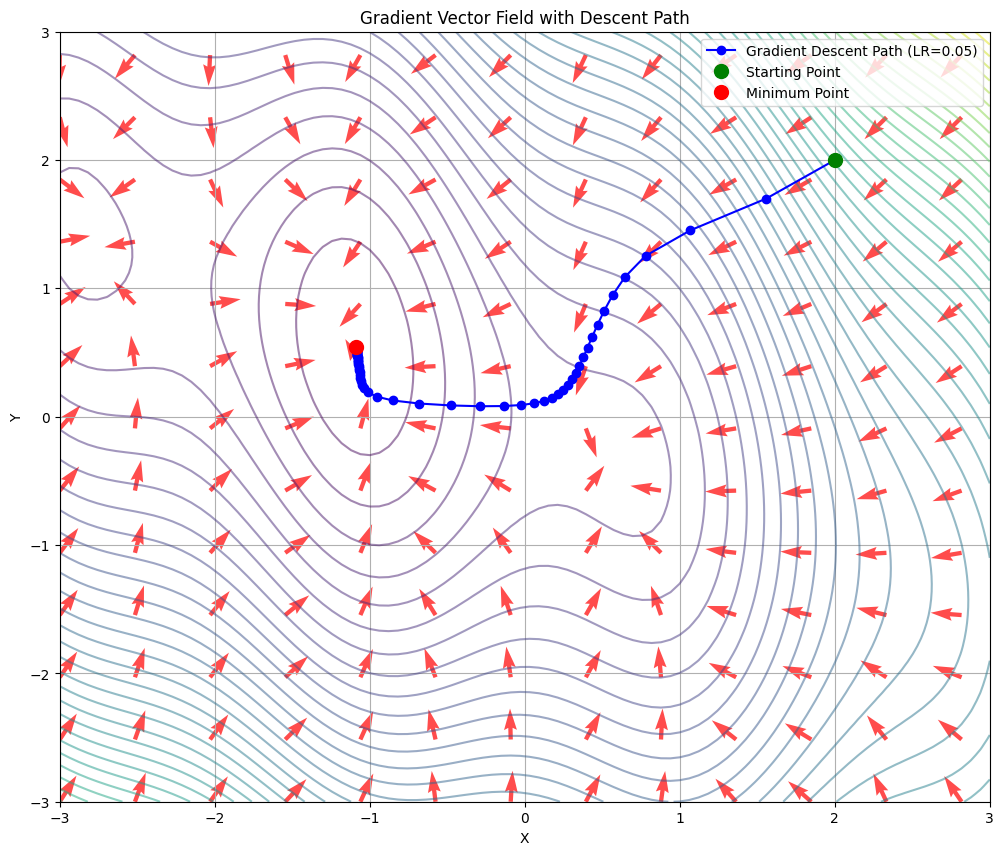

In [7]:
# Plot vector field (gradient directions)
plt.figure(figsize=(12, 10))
skip = 8  # Skip some points to make the plot clearer
x_skip, y_skip = x[::skip], y[::skip]
X_skip, Y_skip = np.meshgrid(x_skip, y_skip)

U = np.zeros_like(X_skip)
V = np.zeros_like(Y_skip)

for i in range(len(x_skip)):
    for j in range(len(y_skip)):
        grad = gradient(X_skip[j, i], Y_skip[j, i])
        grad_norm = np.linalg.norm(grad)
        if grad_norm > 0:
            # Normalize and reverse for descent direction
            U[j, i] = -grad[0] / grad_norm
            V[j, i] = -grad[1] / grad_norm

plt.contour(X, Y, Z, 50, cmap='viridis', alpha=0.5)
plt.quiver(X_skip, Y_skip, U, V, color='r', alpha=0.7, scale=30)

# Add the best path
best_path = paths['Learning Rate = 0.05']
plt.plot(best_path[:, 0], best_path[:, 1], 'o-', color='blue', label='Gradient Descent Path (LR=0.05)')
plt.plot(best_path[0, 0], best_path[0, 1], 'go', markersize=10, label='Starting Point')
plt.plot(best_path[-1, 0], best_path[-1, 1], 'ro', markersize=10, label='Minimum Point')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gradient Vector Field with Descent Path')
plt.legend()
plt.grid(True)
plt.savefig('gradient_vector_field.png', dpi=300)
plt.show()

In [8]:
# Implement gradient descent with momentum
def gradient_descent_momentum(learning_rate=0.01, momentum=0.9, max_iterations=1000, tol=1e-6):
    # Initial point
    point = np.array([2.0, 2.0])
    velocity = np.zeros(2)
    path = [point.copy()]

    for i in range(max_iterations):
        grad = gradient(point[0], point[1])

        # Update with momentum
        velocity = momentum * velocity - learning_rate * grad
        new_point = point + velocity

        # Check for convergence
        if np.linalg.norm(new_point - point) < tol:
            point = new_point
            path.append(point.copy())
            break

        point = new_point
        path.append(point.copy())

    return np.array(path)

# Run gradient descent with momentum
momentum_path = gradient_descent_momentum(learning_rate=0.01, momentum=0.9)
final_point = momentum_path[-1]
min_value = f(final_point[0], final_point[1])

print(f"Gradient Descent with Momentum:")
print(f"  Minimum found at: x = {final_point[0]:.6f}, y = {final_point[1]:.6f}")
print(f"  Function value at minimum: {min_value:.6f}")
print(f"  Number of iterations: {len(momentum_path)}")

Gradient Descent with Momentum:
  Minimum found at: x = -1.088154, y = 0.544091
  Function value at minimum: -2.280710
  Number of iterations: 235


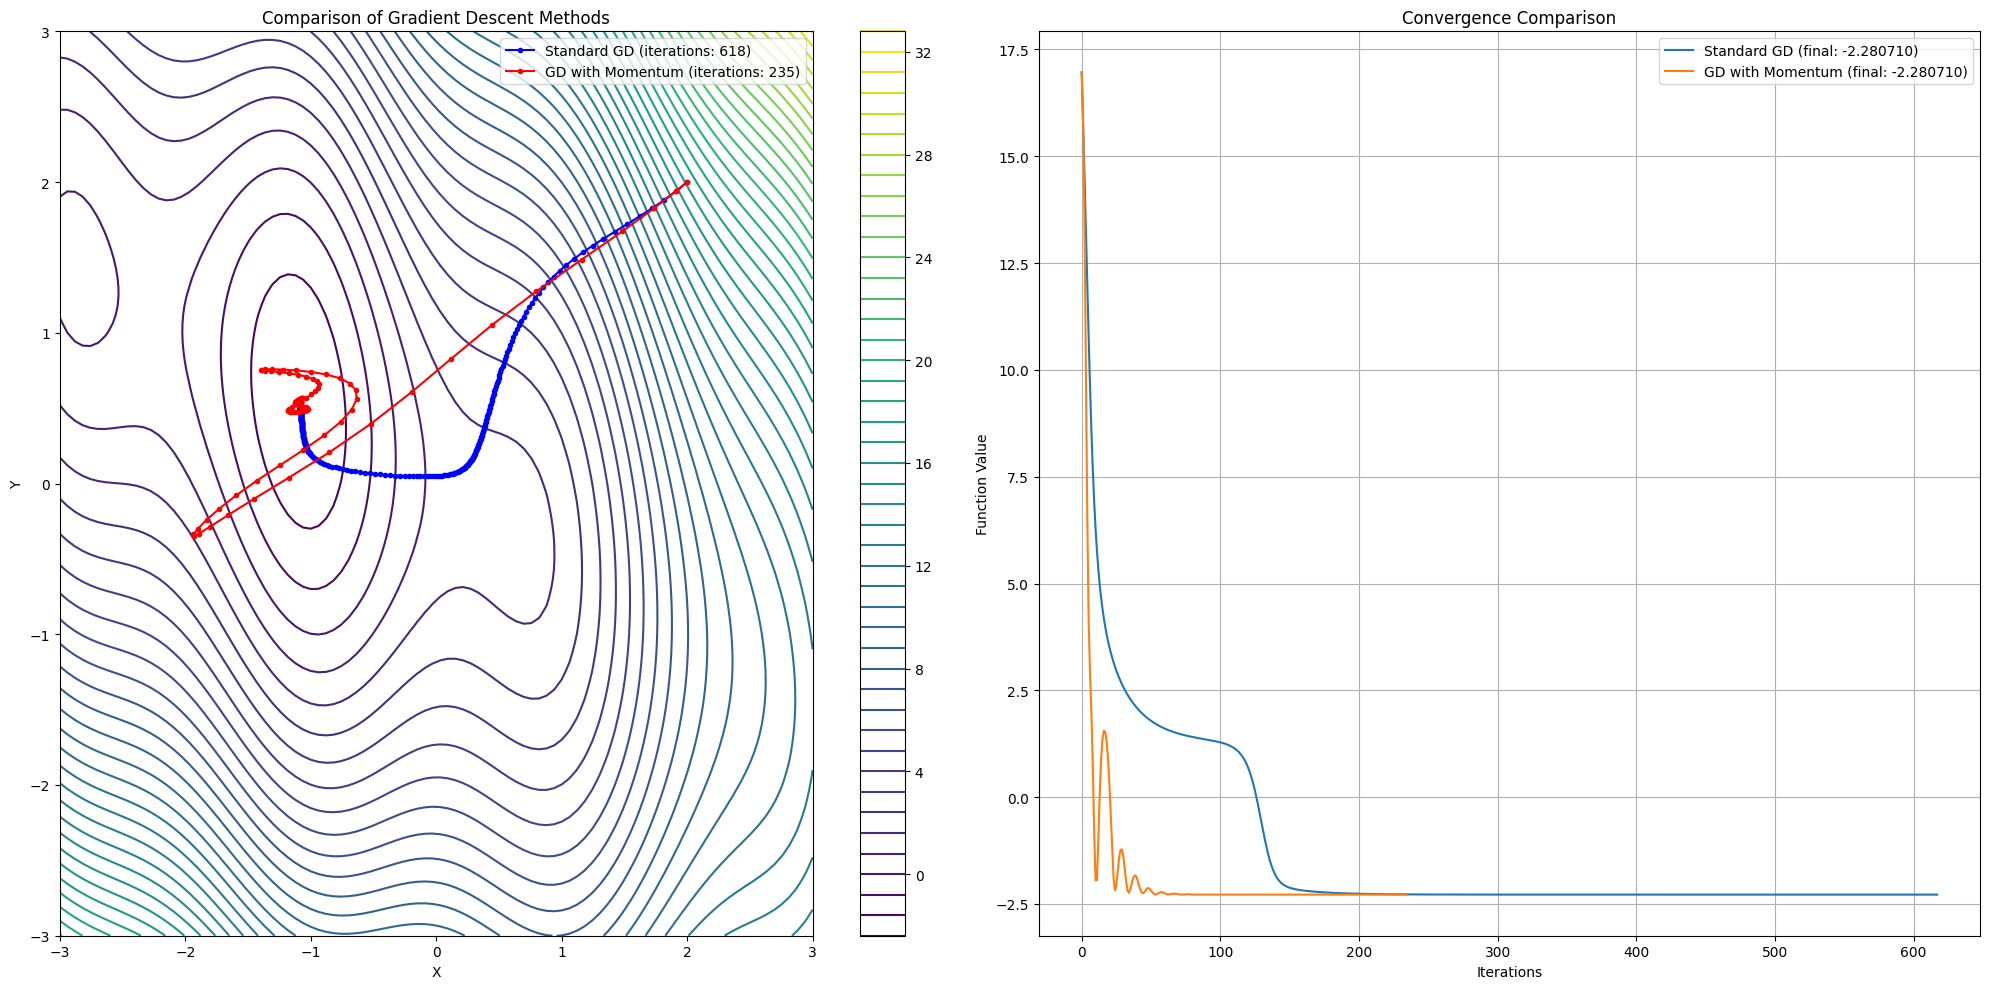

In [9]:
# Compare standard GD with momentum
plt.figure(figsize=(20, 10))

# Contour plot comparison
ax1 = plt.subplot(121)
contour = ax1.contour(X, Y, Z, 50, cmap='viridis')
plt.colorbar(contour, ax=ax1)

# Standard GD
standard_path = paths['Learning Rate = 0.01']
ax1.plot(standard_path[:, 0], standard_path[:, 1], 'o-', color='blue',
         markersize=3, label=f'Standard GD (iterations: {len(standard_path)})')

# GD with momentum
ax1.plot(momentum_path[:, 0], momentum_path[:, 1], 'o-', color='red',
         markersize=3, label=f'GD with Momentum (iterations: {len(momentum_path)})')

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Comparison of Gradient Descent Methods')
ax1.legend()

# Convergence comparison
ax2 = plt.subplot(122)
standard_values = [f(p[0], p[1]) for p in standard_path]
momentum_values = [f(p[0], p[1]) for p in momentum_path]

ax2.plot(range(len(standard_values)), standard_values,
         label=f'Standard GD (final: {standard_values[-1]:.6f})')
ax2.plot(range(len(momentum_values)), momentum_values,
         label=f'GD with Momentum (final: {momentum_values[-1]:.6f})')

ax2.set_xlabel('Iterations')
ax2.set_ylabel('Function Value')
ax2.set_title('Convergence Comparison')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.savefig('gradient_descent_comparison.png', dpi=300)
plt.show()

Best minimum found across all methods:
  Coordinates: x = -1.08816202, y = 0.54407764
  Function value: -2.28070971
  Gradient at minimum: [0.00000074, -0.00000673]
  Gradient norm: 0.00000677


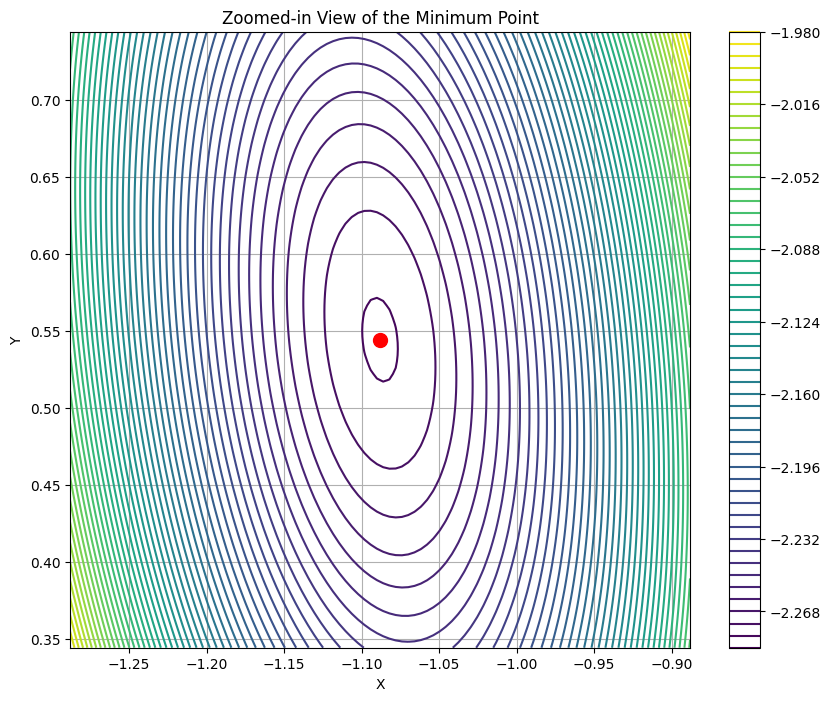

In [10]:
# Get the best minimum from all methods
all_paths = list(paths.values()) + [momentum_path]
all_final_points = [path[-1] for path in all_paths]
all_function_values = [f(p[0], p[1]) for p in all_final_points]

best_idx = np.argmin(all_function_values)
best_point = all_final_points[best_idx]
best_value = all_function_values[best_idx]

print(f"Best minimum found across all methods:")
print(f"  Coordinates: x = {best_point[0]:.8f}, y = {best_point[1]:.8f}")
print(f"  Function value: {best_value:.8f}")

# Verify that gradient is close to zero at the minimum
min_gradient = gradient(best_point[0], best_point[1])
print(f"  Gradient at minimum: [{min_gradient[0]:.8f}, {min_gradient[1]:.8f}]")
print(f"  Gradient norm: {np.linalg.norm(min_gradient):.8f}")

# Create a zoomed-in contour plot around the minimum
x_zoom = np.linspace(best_point[0] - 0.2, best_point[0] + 0.2, 100)
y_zoom = np.linspace(best_point[1] - 0.2, best_point[1] + 0.2, 100)
X_zoom, Y_zoom = np.meshgrid(x_zoom, y_zoom)
Z_zoom = f(X_zoom, Y_zoom)

plt.figure(figsize=(10, 8))
contour = plt.contour(X_zoom, Y_zoom, Z_zoom, 50, cmap='viridis')
plt.colorbar(contour)
plt.plot(best_point[0], best_point[1], 'ro', markersize=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Zoomed-in View of the Minimum Point')
plt.grid(True)
plt.savefig('minimum_point_zoom.png', dpi=300)
plt.show()